# Additional Plots to make a point

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import tensorflow as tf
from mlreflect.data_generation import ReflectivityGenerator
from mlreflect.models import DefaultTrainedModel
from mlreflect.training import InputPreprocessor, OutputPreprocessor
from mlreflect.data_generation import Layer, Substrate, AmbientLayer, MultilayerStructure

In [28]:
matplotlib.rcParams.update({
    "font.size": 20,
    "boxplot.boxprops.color": "gray",
    "boxplot.patchartist":True,
    "boxplot.showfliers": False,
    "boxplot.notch": True,
    "boxplot.medianprops.color": "firebrick",
    "patch.facecolor": "lightgray"
                         })

In [29]:
noise_level=1
uniform_noise_range_low=1-noise_level
uniform_noise_range_high=1+noise_level

In [30]:
q_values = np.arange(0, 1, 1/500)

substrate = Substrate('Si', 1, 20.0701+0.4571j)
layer1 = Layer('SiOx', 10, 2.5, 17.7735+0.4048j)
layer2 = Layer('Film', (290, 300), (0, 2), (1, 14))
ambient = AmbientLayer('ambient', 0)
sample = MultilayerStructure()
sample.set_substrate(substrate)
sample.set_ambient_layer(ambient)
sample.add_layer(layer1)
sample.add_layer(layer2)

generator = ReflectivityGenerator(q_values, sample)
labels = generator.generate_random_labels(1)
reflectivity = generator.simulate_reflectivity(labels)

100%|██████████| 1/1 [00:00<00:00, 643.00it/s]


In [31]:
from mlreflect.models import DefaultTrainedModel, TrainedModel
s=DefaultTrainedModel().sample
print(s)

Air (ambient):
	sld: 0 [1e-6 1/Å^2]
[1] Film:
	thickness: (20, 1000) [Å]
	roughness: (0, 100) [Å]
	sld: (1, 14) [1e-6 1/Å^2]
[0] SiOx:
	thickness: 10.0 [Å]
	roughness: 2.5 [Å]
	sld: (17.7735+0.4048j) [1e-6 1/Å^2]
Si (substrate):
	roughness: 1 [Å]
	sld: (20.0701+0.4571j) [1e-6 1/Å^2]


In [32]:
# refl=np.loadtxt("/home/maximilian/Dropbox/Studium/bachelor_thesis/bachelor_thesis_cnn/src/data/debug/reflectivity_real_scale.csv")[:100]
refl=reflectivity
noisy = refl*tf.random.uniform(
                    shape=refl.shape, minval=uniform_noise_range_low, maxval=uniform_noise_range_high).numpy()


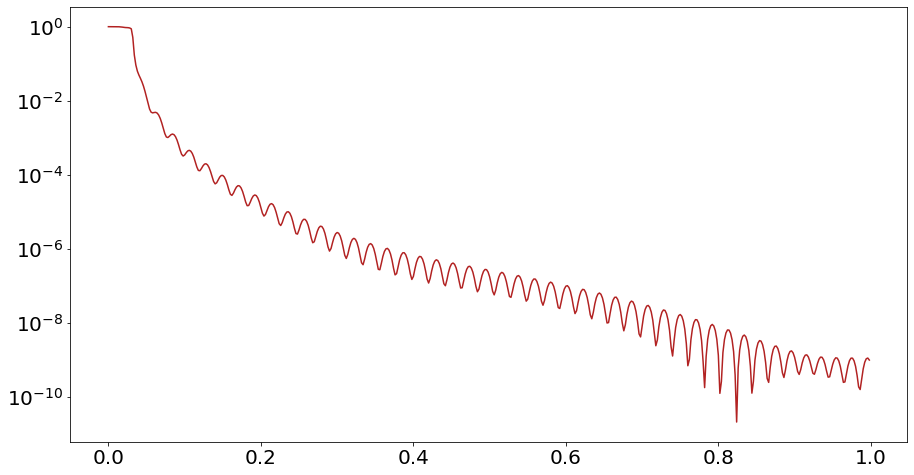

In [36]:
x=q_values
y=refl[0]
fig_no_noise = plt.figure(figsize=(15,8))
ax_no_noise = plt.gca()
ax_no_noise.semilogy(x, y, color="firebrick")
fig_no_noise.savefig("../presentation/curve.pdf")

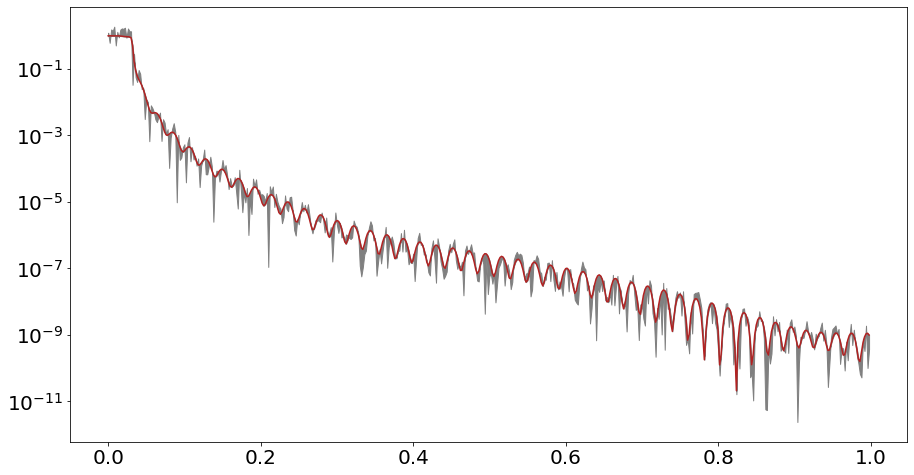

In [33]:
x=q_values
y=refl[0]
fig = plt.figure(figsize=(15,8))
ax = plt.gca()
ax.semilogy(x, y, color="firebrick")

ax.fill_between(x, y, noisy[0], color="gray")
# ax.set_title("Example Training Curve (simulated, with uniform noise)")
# ax.set_xlabel("q in $\mathrm{\AA^{-1}}$")
# ax.set_ylabel("I in a.u.")
fig.savefig("../presentation/noisy_curve.pdf")